## Цели и задачи исследования

**Цель:** исследование причин убыточности развлекательного приложения.

**Задачи:**
- исследовать каналы привлечения пользователей и их профили,
- посчитать сколько денег приносит каждый клиент
- проанализировать расходы на маркетинг,
- оценить окупаемость рекламы,
- определить какие факторы мешают привлечению клиентов.

**Заказчик:** менеджмент компании-разработчика приложения.

**План работ:**
- предобработка данных: проверка и заполнение пропусков, поиск дубликатов, проверка коррекктности типов данных;
- исследовательский анализ данных о пользователях: составление профилей, регион, типы устройств, рекламные источники привлечения;
- исследование затрат на маркетинг: общий, по источникм, средний на пользователя; 
- оценить окупаемость рекламы с разбивкой по: устройствам, странам, рекламным каналам;
- разработка рекомендаций для рекламного отдела.

**Описание данных:** есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы.

## Общая информация о данных

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('visits_info_short.csv')

display(visits.head())
visits.info()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [3]:
orders = pd.read_csv('orders_info_short.csv')

display(orders.head())
orders.info()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [4]:
costs = pd.read_csv('costs_info_short.csv')

display(costs.head())
costs.info()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Выводы:**
- в работу взяли три датафрейма, в каждом из которых некорректен тип данных в столбцах, хранящих данные о дате и времени;
- в названиях столбцов во всех датасетах есть заглавные буквы и пробелы.

## Предобработка данных
Проверим наличие строк-дубликатов и пропусков в данных, а также скорректируем тип данных в столбцах, хранящих дату и время и исправим названия столбцов.

In [5]:
#приведем названия столбцов в датасетах к строчному виду и 
#заменим пробелы знаком нижним подчеркивание
visits.columns = map(str.lower, visits.columns)
visits.columns = visits.columns.str.replace(' ', '_')

#преобразуем тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_start'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
orders.columns = map(str.lower, orders.columns)
orders.columns = orders.columns.str.replace(' ', '_')

orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
costs.columns = map(str.lower, costs.columns)

costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Проверим наличие пропусков в данных в каждом из датасетов.

In [10]:
print(visits.isna().sum())
print()
print(orders.isna().sum())
print()
print(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64


Проверим наличие строк-дубликатов в трех исследуемых датасетах.

In [11]:
print('Количество строк-дубликатов в visits:', visits.duplicated().sum())
print('Количество строк-дубликатов в orders:', orders.duplicated().sum())
print('Количество строк-дубликатов в costs:', costs.duplicated().sum())

Количество строк-дубликатов в visits: 0
Количество строк-дубликатов в orders: 0
Количество строк-дубликатов в costs: 0


**Выводы:**
- строк-дубликовто не обнаружено;
- в данных отсутствуют пропуски;
- скорректированы названия столбцов: приведены к нижнему регистру, пробел заменен на знак нижнего подчеркивания "_";
- изменен тип данных в трех датасетах в столбцах, хранящих информацию о дате и времени с типа object на datetime64.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

В этом разделе собраны функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### get_profiles - создание пользовательских профилей

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### get_retention - расчет удержания

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_conversion - расчет конверсии

In [14]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### get_ltv - расчет LTV и ROI

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### filter_data - сглаживание фрейма

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### plot_retention -  визуализация удержания

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### plot_conversion - визуализация конверсии

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### plot_ltv_roi - визуализация LTV и ROI

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

Составим профили пользователей и определим диапазон дат их привлечения. Рассчитаем распределение платящих пользователей по регионам, типам устройств и рекламным источникам.

In [20]:
profiles = get_profiles(visits, orders, costs)
print(profiles.head(5)) 

    user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt               month  payer  acquisition_cost  
0  2019-05-07 2019-05-07 20:58:57   True          1.088172  
1  2019-07-09 2019-07-09 12:46:07  False          1.107237  
2  2019-10-01 2019-10-01 09:58:33  False          0.000000  
3  2019-08-22 2019-08-22 21:35:48  False          0.988235  
4  2019-10-02 2019-10-02 00:07:44  False          0.230769  


In [21]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [22]:
print('Минимальная дата привлечения пользователей', profiles['first_ts'].min())
print('Максимальная дата привлечения пользователей', profiles['first_ts'].max())

Минимальная дата привлечения пользователей 2019-05-01 00:00:41
Максимальная дата привлечения пользователей 2019-10-27 23:59:04


Исследование будем основывать на 150 008 профилях, минимальная дата привлечекния пользователя - 1 мая 2019, максимальная - 27 октября 2019. 

In [23]:
grouped_region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'})
grouped_region['payer_ratio'] = (grouped_region['payer'] / grouped_region['user_id'] * 100).round(2)
grouped_region.columns = ['count', 'count_payer', 'ratio_payer']
grouped_region.sort_values('ratio_payer', ascending=False)

count  count_payer  ratio_payer
region                                         
United States  100002         6902         6.90
Germany         14981          616         4.11
UK              17575          700         3.98
France          17450          663         3.80

2/3 пользователей приложения из США и на долю этой страны приходится больше всего платящих пользователей - 6.9%. Меньше всего пользователей из Германии - 14 981, или 10%. А наименьшая доля платящих пользователей из Франции - 3.8%.

In [24]:
grouped_device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'})
grouped_device['payer_ratio'] = (grouped_device['payer'] / grouped_device['user_id'] * 100).round(2)
grouped_device.columns = ['count', 'count_payer', 'ratio_payer']
grouped_device.sort_values('ratio_payer', ascending=False)

count  count_payer  ratio_payer
device                                  
Mac      30042         1912         6.36
iPhone   54479         3382         6.21
Android  35032         2050         5.85
PC       30455         1537         5.05

Большая часть клиентов приложения пользуется им на iPhone - 54 479 человек. Mac и PC используются около 30 000 пользователей и чуть больше - 35 000 - пользователи Android. Доя платящих клиентов выше всего среди пользователей с Mac - 6.36%, а наименьшая среди клиентов с PC - 5.05%.

In [25]:
grouped_channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'})
grouped_channel['payer_ratio'] = (grouped_channel['payer'] / grouped_channel['user_id'] * 100).round(2)
grouped_channel.columns = ['count', 'count_payer', 'ratio_payer']
grouped_channel.sort_values('ratio_payer', ascending=False)

count  count_payer  ratio_payer
channel                                            
FaceBoom            29144         3557        12.20
AdNonSense           3880          440        11.34
lambdaMediaAds       2149          225        10.47
TipTop              19561         1878         9.60
RocketSuperAds       4448          352         7.91
WahooNetBanner       8553          453         5.30
YRabbit              4312          165         3.83
MediaTornado         4364          156         3.57
LeapBob              8553          262         3.06
OppleCreativeMedia   8605          233         2.71
organic             56439         1160         2.06

Самая высокая доля платящих пользователей - 12.2% - была привлечена из источника FaceBoom. Также высокая доля платящих пользователей, привлеченных через AdNonSense и lambdaMediaAds, 11.34 и 10.47% соответственно. Минимальная доля платящих пользователей среди тех, кто пришел органически через поисковые системы - 2.06%.

**Выводы:**
- исследование будем основывать на 150 008 профилях, диапазон дат привлечения пользователей - с 1 мая 2019 по 27 октября 2019;
- 2/3 пользователей приложения из США и на долю этой страны приходится больше всего платящих пользователей - 6.9%, наименьшая доля платящих пользователей из Франции - 3.8%;
- большая часть клиентов приложения пользуется им на iPhone - 54 479 человек. Mac и PC используются около 30 000 пользователей и чуть больше - 35 000 - пользователи Android. Доя платящих клиентов выше всего среди пользователей с Mac - 6.36%, а наименьшая среди клиентов с PC - 5.05%;
- FaceBoom, AdNonSense и lambdaMediaAds  - самые результативные каналы привления по доле платящих пользователей - 12.2, 11.34 и 10.47% соответственно клиентов приложения, привлечкнных через них, платят. Минимальная доля платящих пользователей среди тех, кто пришел органически через поисковые системы - 2.06%.

## Затраты на маркетинг

Посчитаем общую сумму расходов на маркетинг и сумму затрат на каждый источник. Рассчитаем, сколько в среднем стоило привлечение одного пользователя (показатель CAC) из каждого источника.

In [26]:
costs.agg({'costs': 'sum'})

costs    105497.3
dtype: float64

Общая сумма расходов на маркетинг с 1 мая 2019 по 27 октября 2019 - 105 497 долларов.

Выясним, как траты распределены по рекламным источникам, то есть сколько денег было потрачено на каждый источник.

In [27]:
costs_channel = costs.groupby('channel').agg({'costs': 'sum'}).sort_values('costs', ascending=False)
costs_channel['costs_ratio'] = (costs_channel['costs'] / 105497.3 * 100).round(2)
costs_channel.sort_values('costs_ratio', ascending=False)

costs  costs_ratio
channel                                  
TipTop              54751.30        51.90
FaceBoom            32445.60        30.75
WahooNetBanner       5151.00         4.88
AdNonSense           3911.25         3.71
OppleCreativeMedia   2151.25         2.04
RocketSuperAds       1833.00         1.74
LeapBob              1797.60         1.70
lambdaMediaAds       1557.60         1.48
MediaTornado          954.48         0.90
YRabbit               944.22         0.90

In [28]:
#добавим в датасет номер месяца и недели для построение графика динамика затрат на рекламу по каналам
profiles['dt'] = pd.to_datetime(profiles['dt'])
profiles['month'] = profiles['dt'].dt.month
profiles['week'] = profiles['dt'].dt.isocalendar().week

profiles.head() 

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

   month  payer  acquisition_cost  week  
0      5   True          1.088172    19  
1      7  False          1.107237    28  
2     10  False          0.000000    40  
3      8  False          0.988235    34  
4     10  False          0.230769    40

Построим график, отражающий динамику ежемесясных и еженедельных затрат на разные рекламные источники за период с 1 мая по 27 октября 2019.

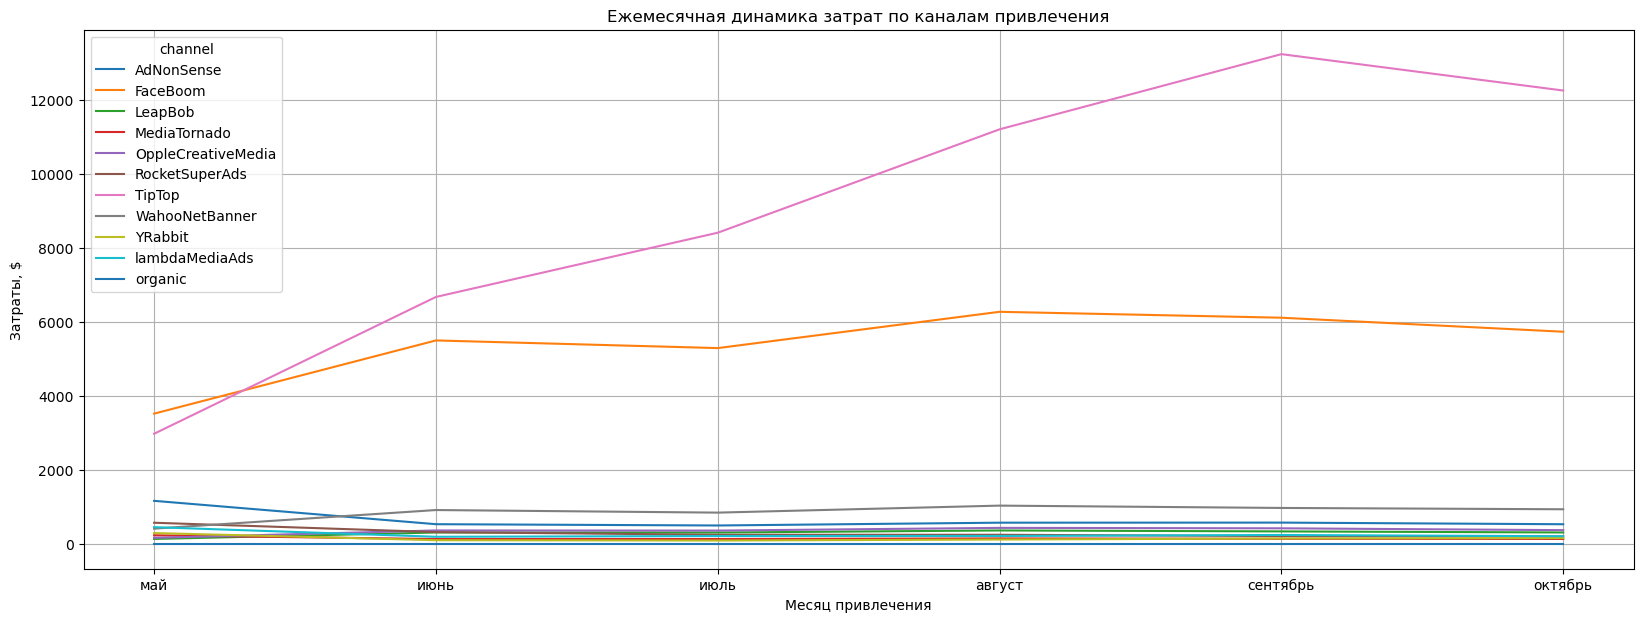

In [29]:
profiles.pivot_table(
    index='month', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(20, 7))

#specify x-axis locations
x_ticks = [5, 6, 7, 8, 9, 10]

#specify x-axis labels
x_labels = ['май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь']

plt.xticks (ticks=x_ticks, labels=x_labels) 

plt.ylabel('Затраты, $')
plt.xlabel('Месяц привлечения')
plt.title('Ежемесячная динамика затрат по каналам привлечения')
plt.show()

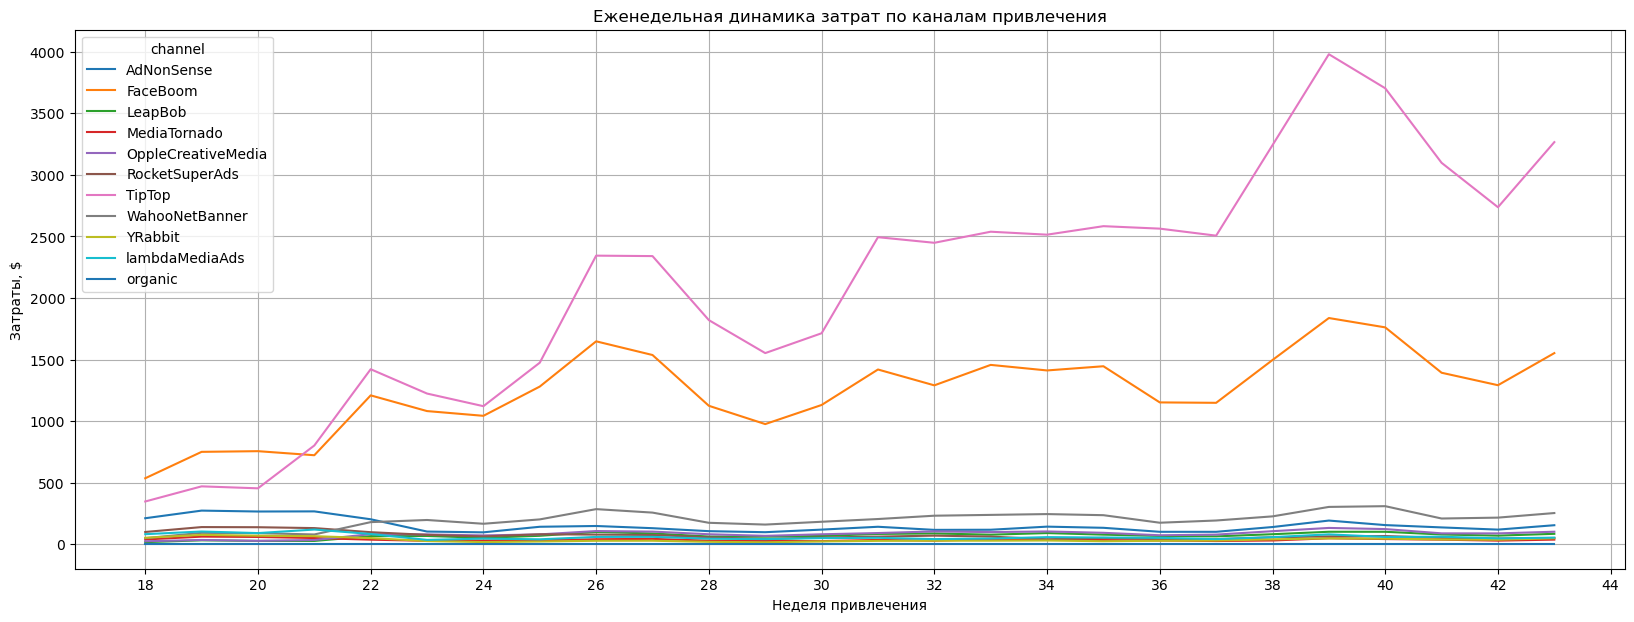

In [30]:
profiles.pivot_table(
    index='week', columns='channel', values='acquisition_cost', aggfunc='sum'
).plot(grid=True, figsize=(20, 7))

#specify x-axis locations
x_ticks = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]

#specify x-axis labels
x_labels = [18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44]

plt.xticks (ticks=x_ticks, labels=x_labels) 

plt.ylabel('Затраты, $')
plt.xlabel('Неделя привлечения')
plt.title('Еженедельная динамика затрат по каналам привлечения')
plt.show()

Рассчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [31]:
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .sort_values('acquisition_cost', ascending=False )
    .rename(columns={'acquisition_cost': 'cac'})
)

cac

cac
channel                     
TipTop              2.799003
FaceBoom            1.113286
AdNonSense          1.008054
lambdaMediaAds      0.724802
WahooNetBanner      0.602245
RocketSuperAds      0.412095
OppleCreativeMedia  0.250000
YRabbit             0.218975
MediaTornado        0.218717
LeapBob             0.210172
organic             0.000000

**Выводы:**
- общая сумма расходов на маркетинг с 1 мая 2019 по 27 октября 2019 - 105 497 долларов;
- на долю TipTop и FaceBoom приходится 80% затрат на рекламу и именно эти источники имеют самый значительный рост затрат в динамике с мая по октябрь, затраты на остальные источники не имеют выраженных колебаний в суммах. В мае затраты на TipTop составляли менее 500 долларов в неделю, а к концу сентября бюджет был 4000 в максимуме. Разброс сумм для FaceBoom меньше - в мае затраты около 500 долларов, с пиком около 1800 долларов в неделю;
- по средней стоимости привлечения 1 пользователя самыми дорогими оказалить следующие каналы привлечения TipTop, FaceBoom и AdNonSense - 2.79, 1.11 и 1 доллар за пользователя соответственно.

## Окупаемость рекламы

Проанализируем окупаемость рекламы исходя из того, что в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Момент анализа - 1 ноября 2019 года.
Кроме анализа окупаемости рекламы проверим конверсию и удержание пользователей, а также исследуем окупаемость с разбивкой по устройствам, странам и рекламным каналам.

Будем анализировать профили пользователей, исключив тех, кто пришел органически, поскольку затраты на рекламу в таком случае равны нулю, а их данные об удержании, конверсии, roi размоют окупаемость рекламы из оплаченных источников.

In [32]:
#зададим момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

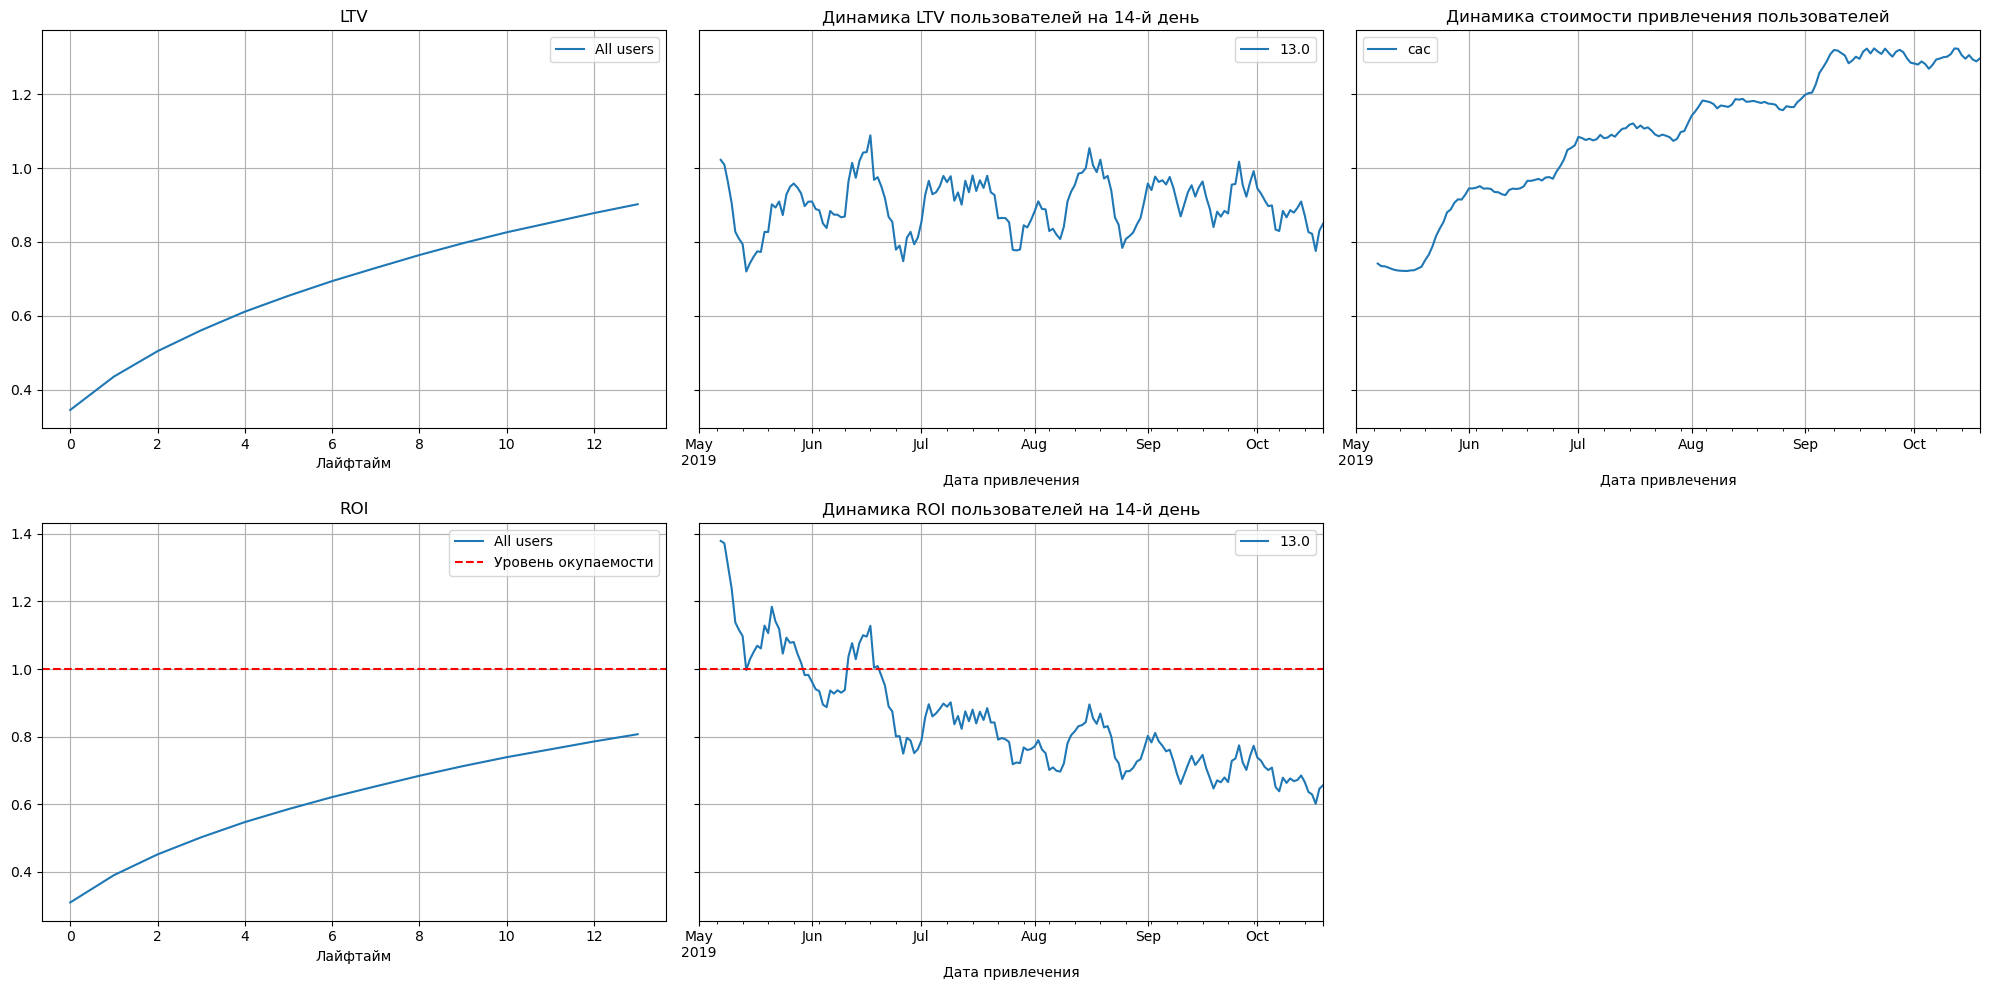

In [33]:
# считаем LTV и ROI
# уберем профили "органиков"
profiles = profiles.query('channel != "organic"')

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Реклама не окупается. ROI в конце двухнедельного периода — чуть выше 80%.
- Стоимость привлечения пользователей значительно растет в динамике.
- LTV в динамике достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- При схожих значениях LTV и увеличении стоимости привлечения 1 пользователя roi ожидаемо снижается и с середины июня привлечение пользователей не окупается. 

Проверим конверсию и удержание пользователей и динамику изменения показателей.

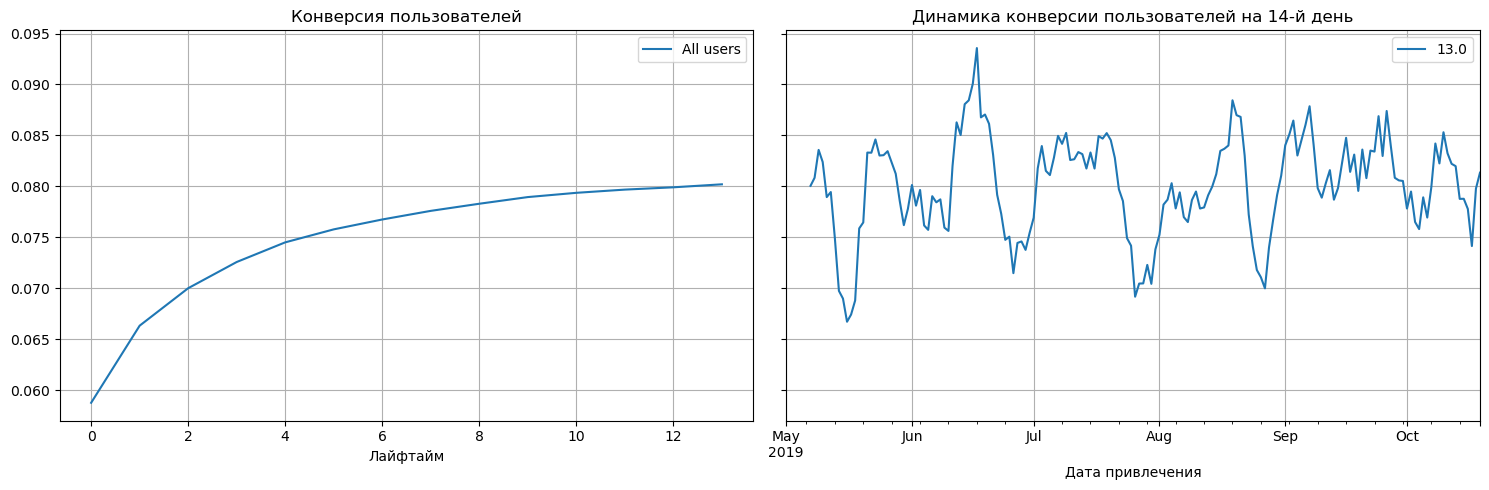

In [34]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

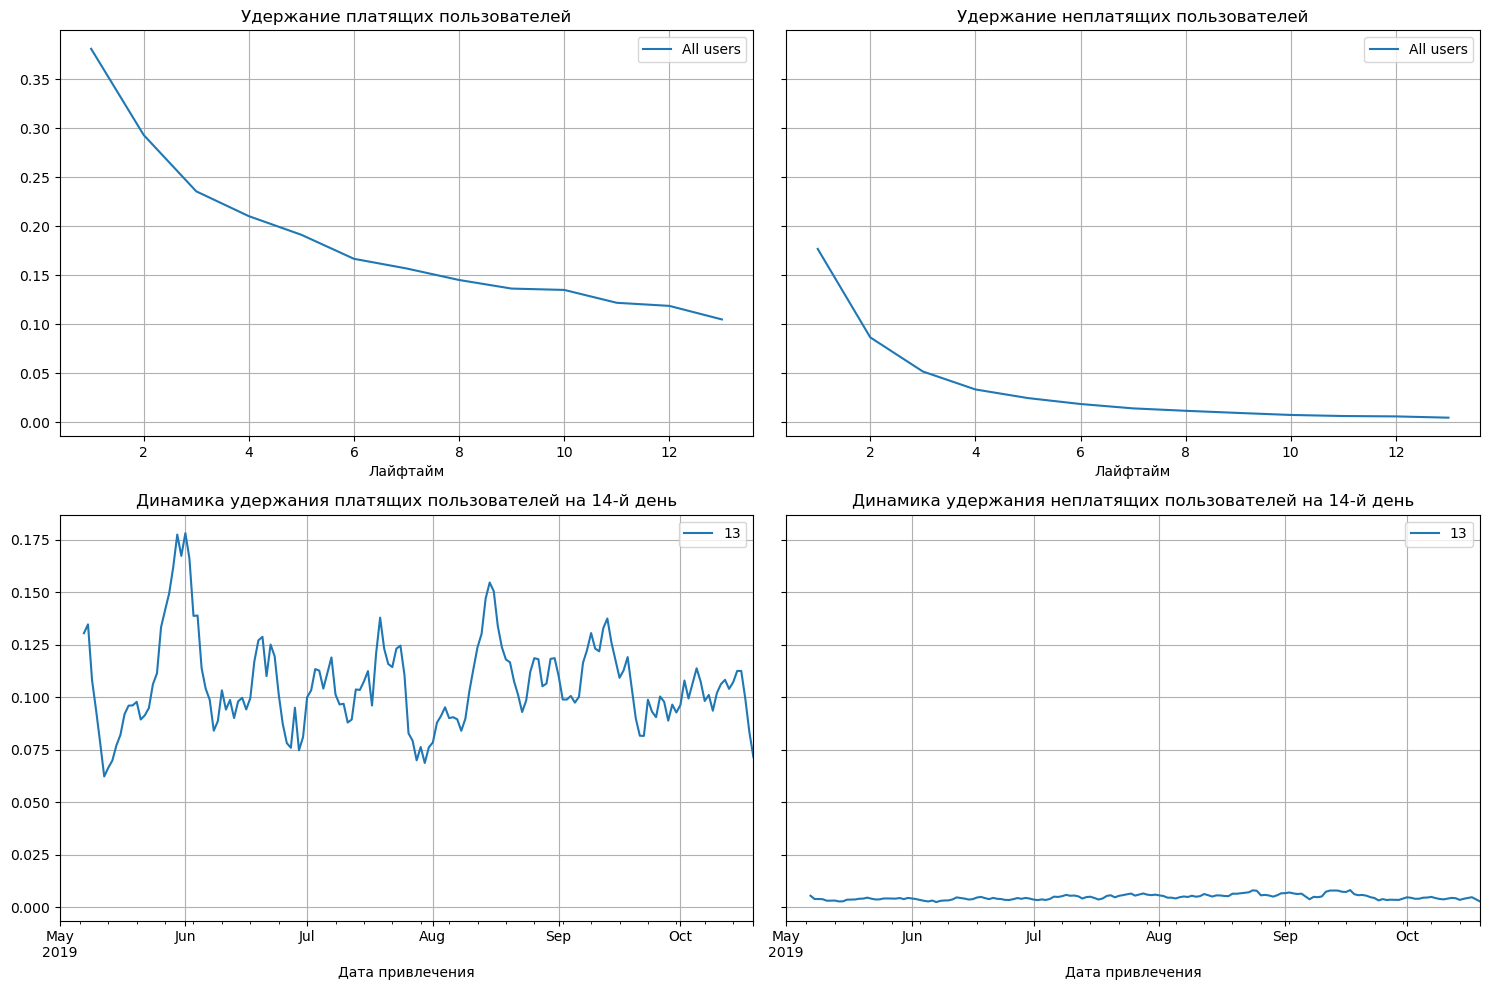

In [35]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

К концу двухнедельного пользования приложением 0,08% пользователей остаются в нем, максимальных значений конверсия достигает в середине месяца. Конверсия имеет колебания в течение месяца, но в общем опказатель стабилен в исследубемом периоде.

Удержание платящих пользователей закономерно выше удержания неплатящих. Доля платящих пользователей, использующих приложение снижается с 0,38% в первый день пользования до 0,1% на 14 день. Показательно удержания в динамике в среднем стабилен, но со второй половины сентября имеет тенденцию к сглаживанию пиков.

### Окупаемость по устройствам

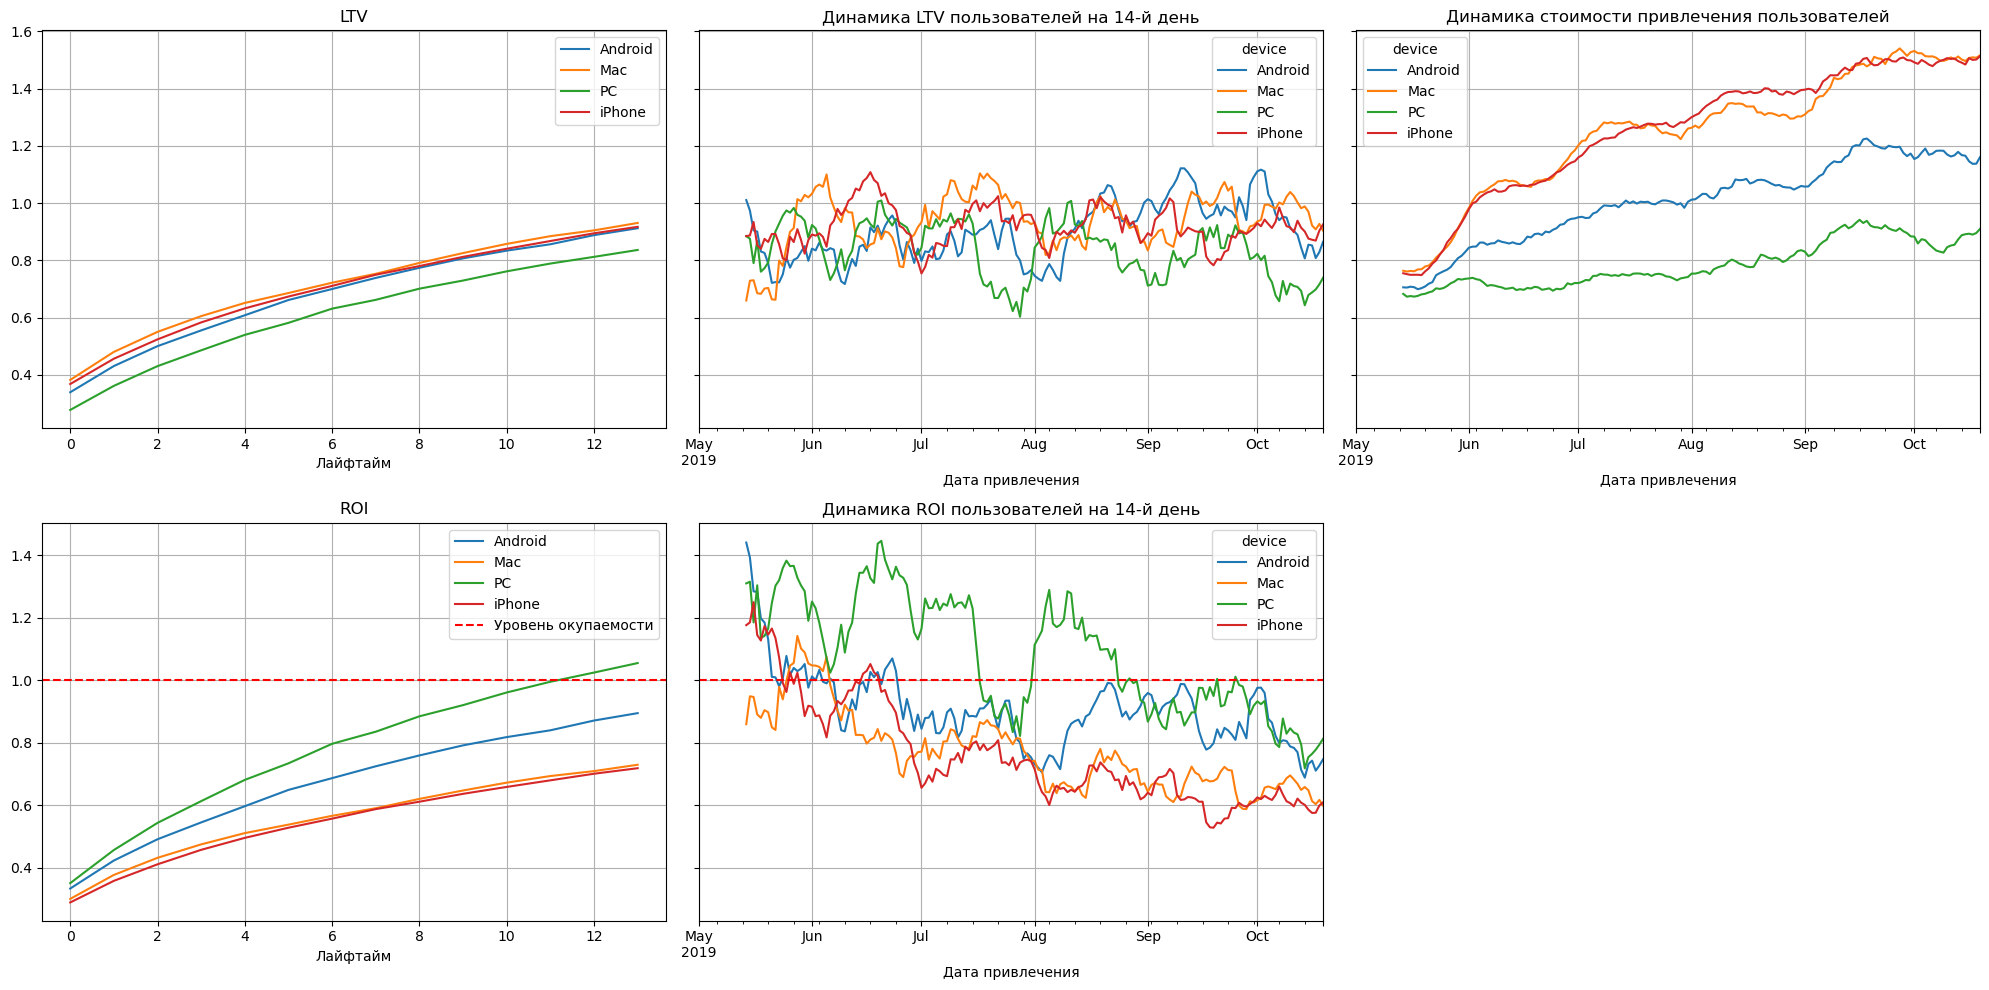

In [36]:
# смотрим окупаемость с разбивкой по девайсам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

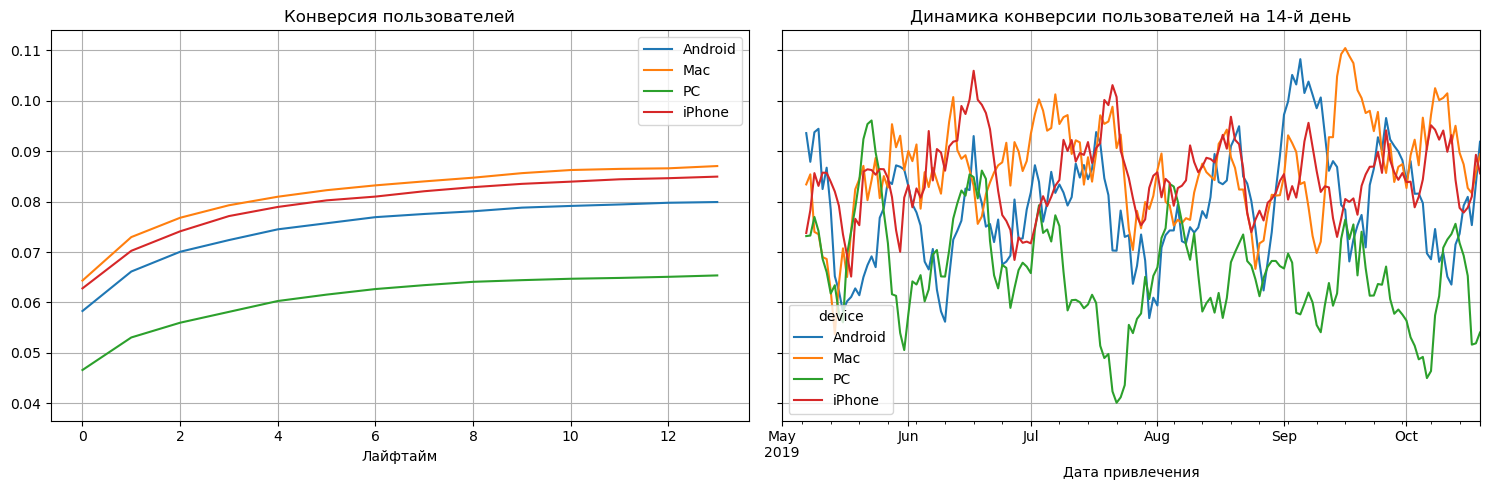

In [37]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

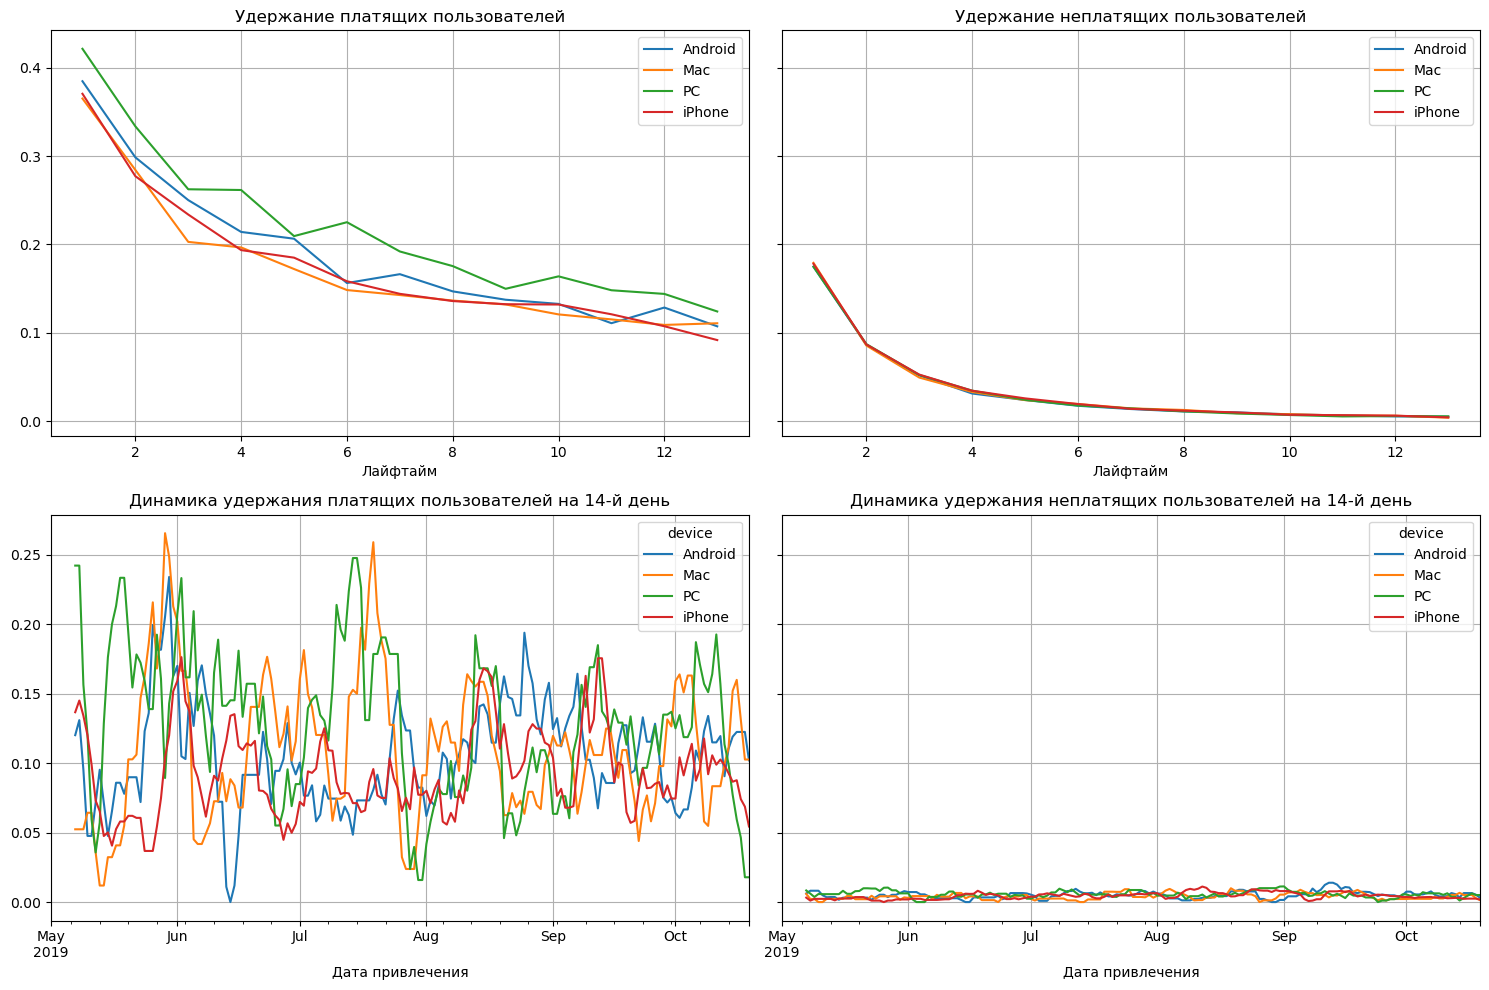

In [38]:
# смотрим удержание по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

С 11 дня окупается реклама с привлечением пользователей, которые пользуются приложением на PC, при этом значения LTV и CAC для этого типа устройст самые низкие. Эти пользователи хуже всего окнвертируются, но лучше всего удерживаются, хотя показатель и имеет значительный разброс значений в динамике - от 0,015 до 0,25. Стоимость привлечения пользователей растет в динамике, но не так радикально как для Mac, iPhone и по-прежнему является наименьшей.

Реклама, привлекшая пользователей с Mac, iPhone (roi - 0,7) и  Android (roi - 0,9) не окупается. 

Стоимость привлечения пользователя значительно растет для Mac, iPhone. Эти пользователи лучше остальных конвертируются, а удержание ниже, чем в пользователей с другими типами устройств.

### Окупаемость по регионам

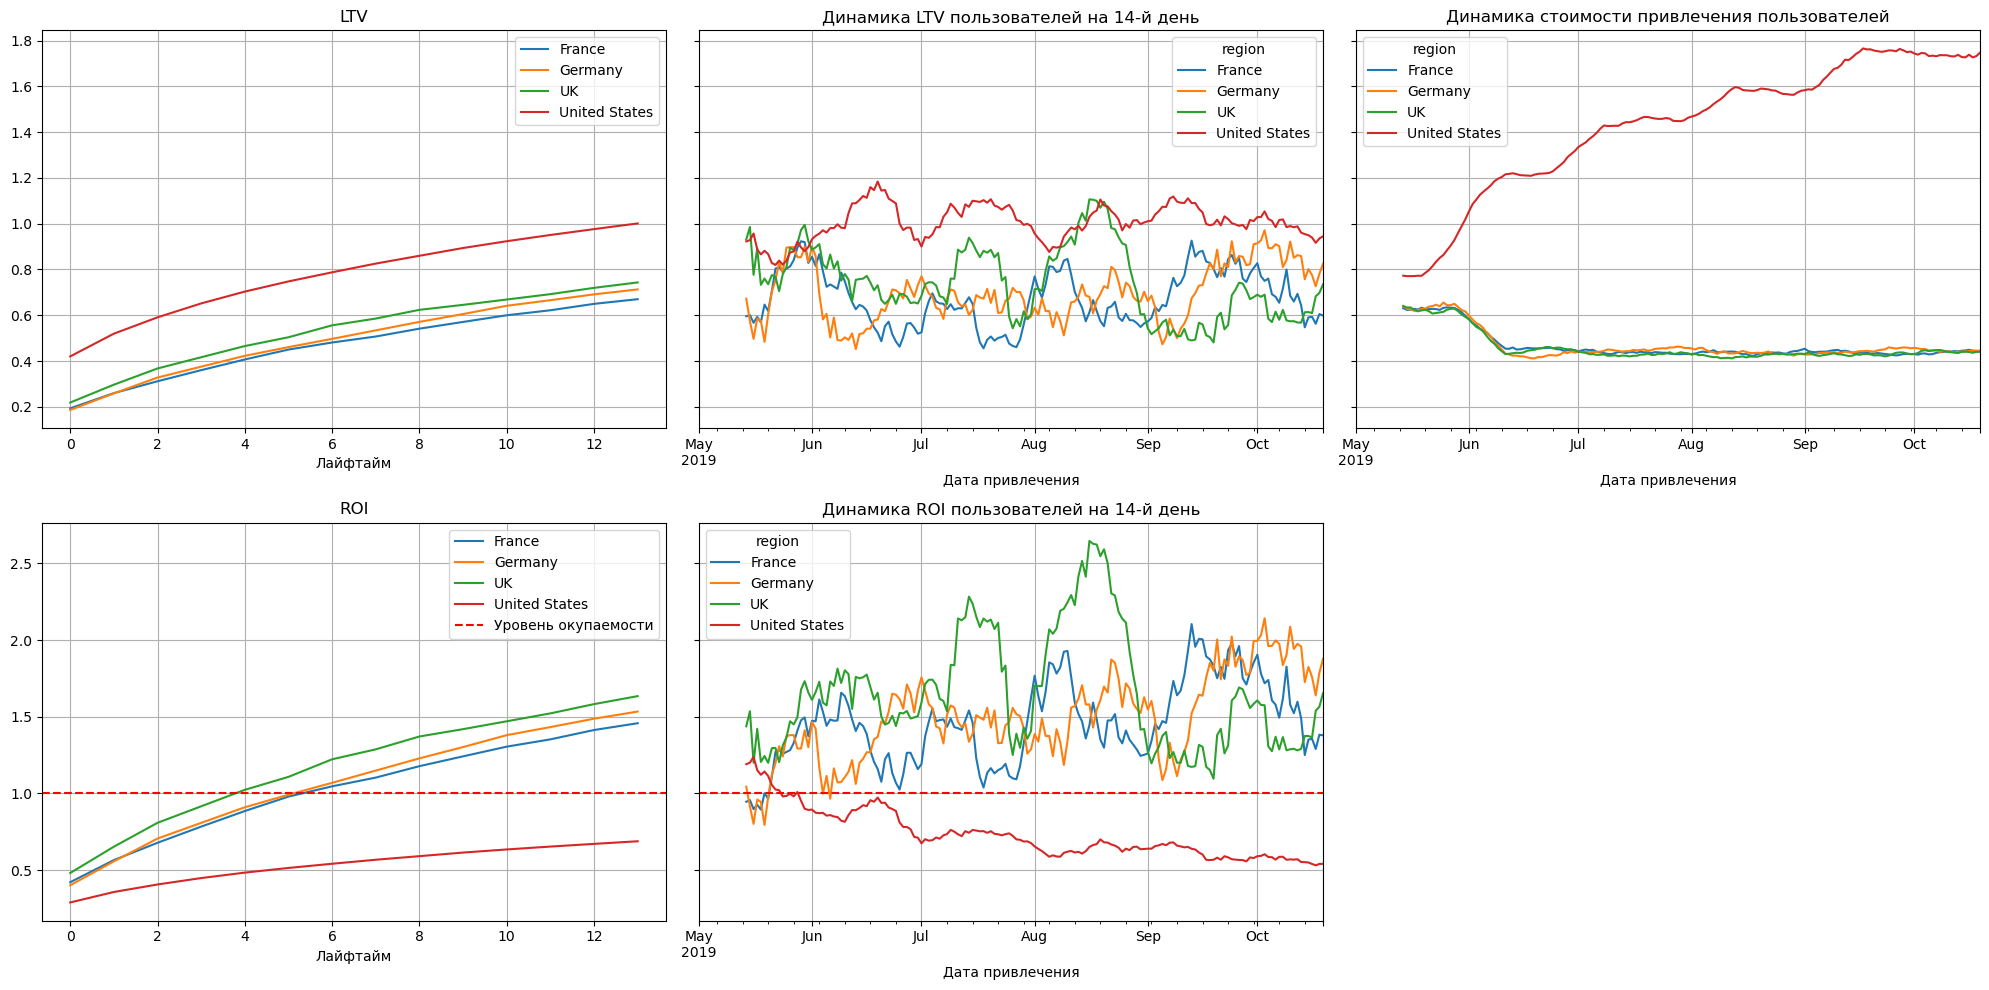

In [39]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

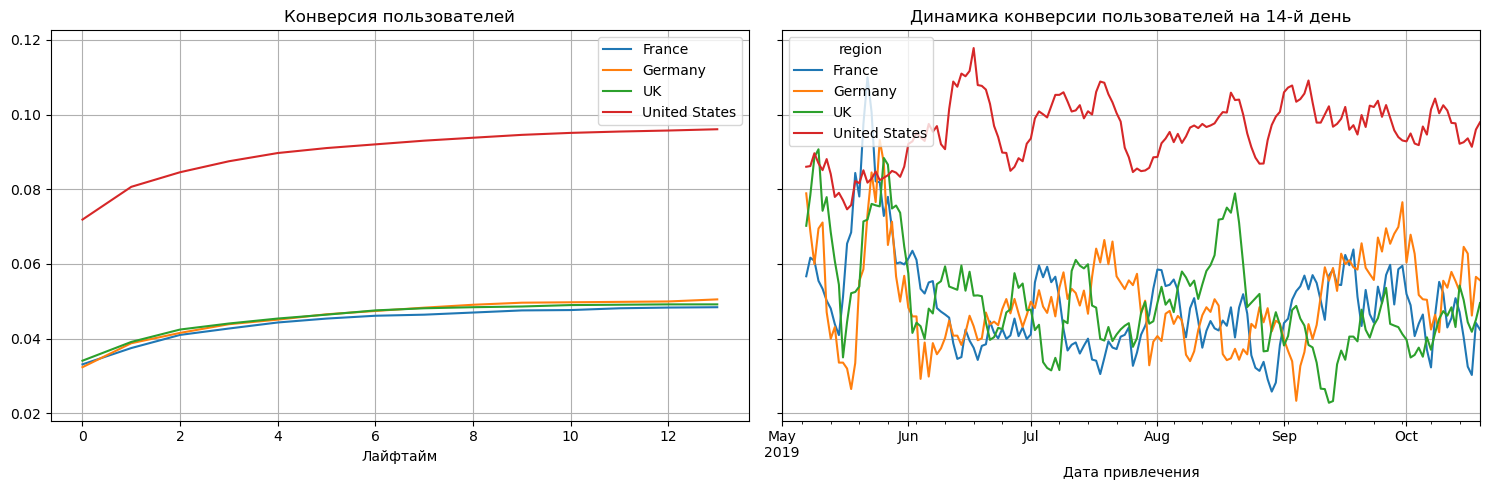

In [40]:
# смотрим конверсию с разбивкой по странам

dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

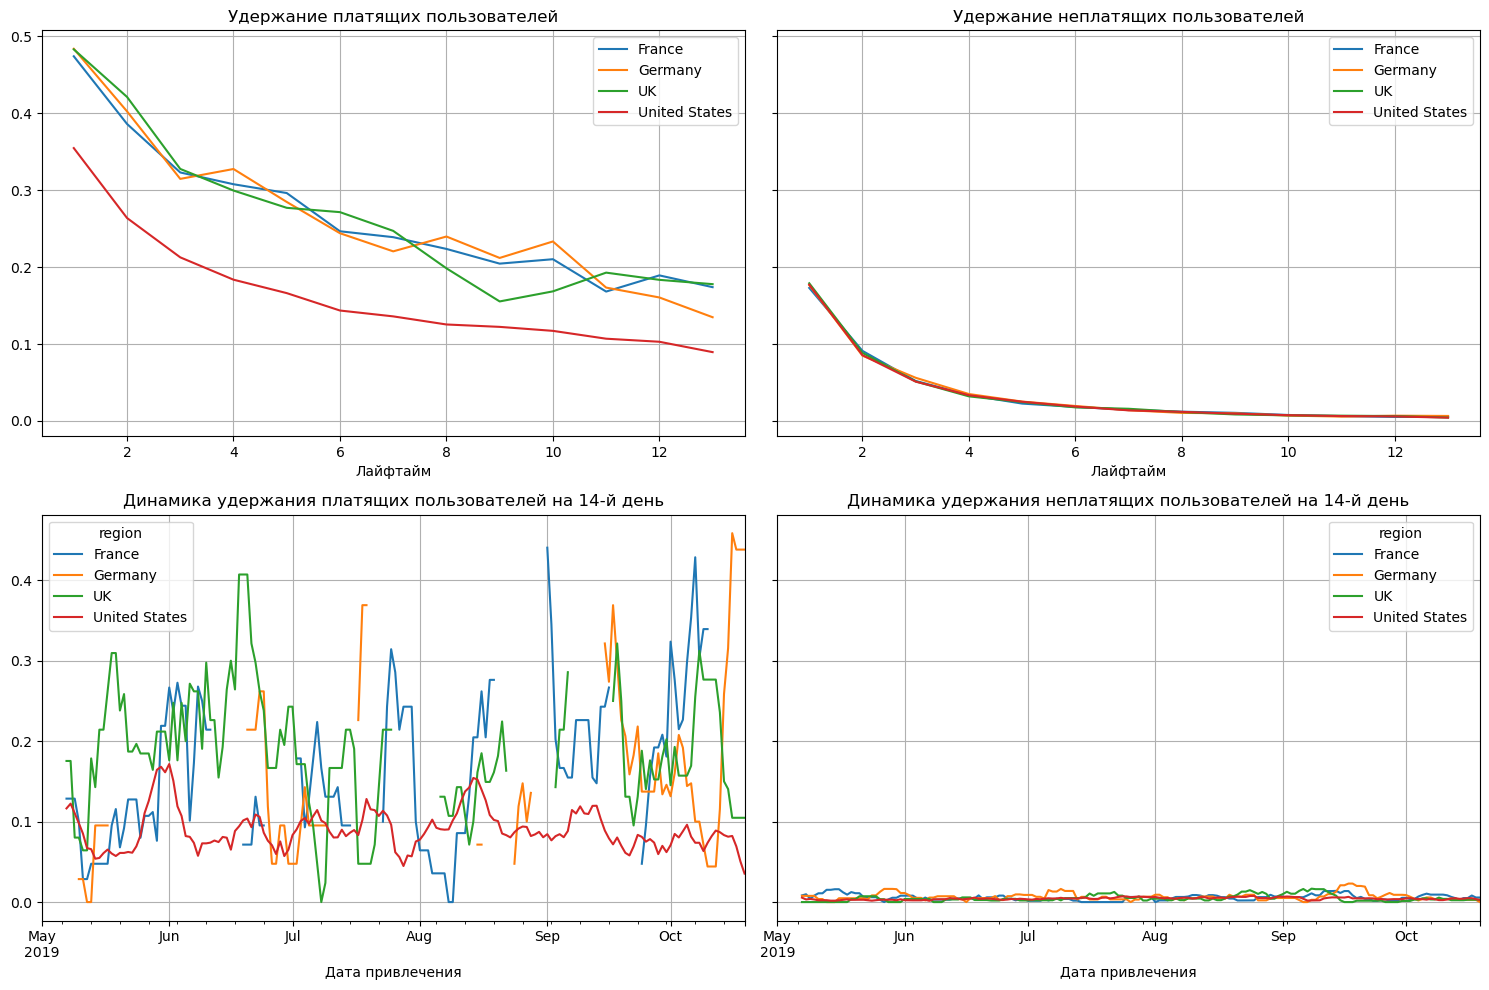

In [41]:
# смотрим удержание по странам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Реклама не окупается только в США, но США - это 2/3 от общего числа пользователей с 1 мая по 27 октября 2019, поэтому показатели по этому региону определеяют общие показатели.

США лидирует по показателю LTV, но высокая стоимость привлечения пользователя не позволяет рекламе окупиться.

Реклама Великобритании, Франции и Германии окупается уже с 4-5 дня, что лучше запланированных бизнес-показателей в 2 раза, по плану пользователь должен окупиться к конце второй недели.

Стоимость привлечения значительно разнится между США и остальными странами: в США увеличилась более чем в 2 раза - с 0,8 до 1,8 долларов, а в Германии, Великобритании и Франции снизилась на 0,2 доллара в мае-июне и держится примерно на одном уровне.

#### Окупаемость рекламы в США

Поскольку 100 000 пользователей из 150 000 из США и реклама в регионе не окупается, рассмотрим этот показатель более детально отдельно по региону.

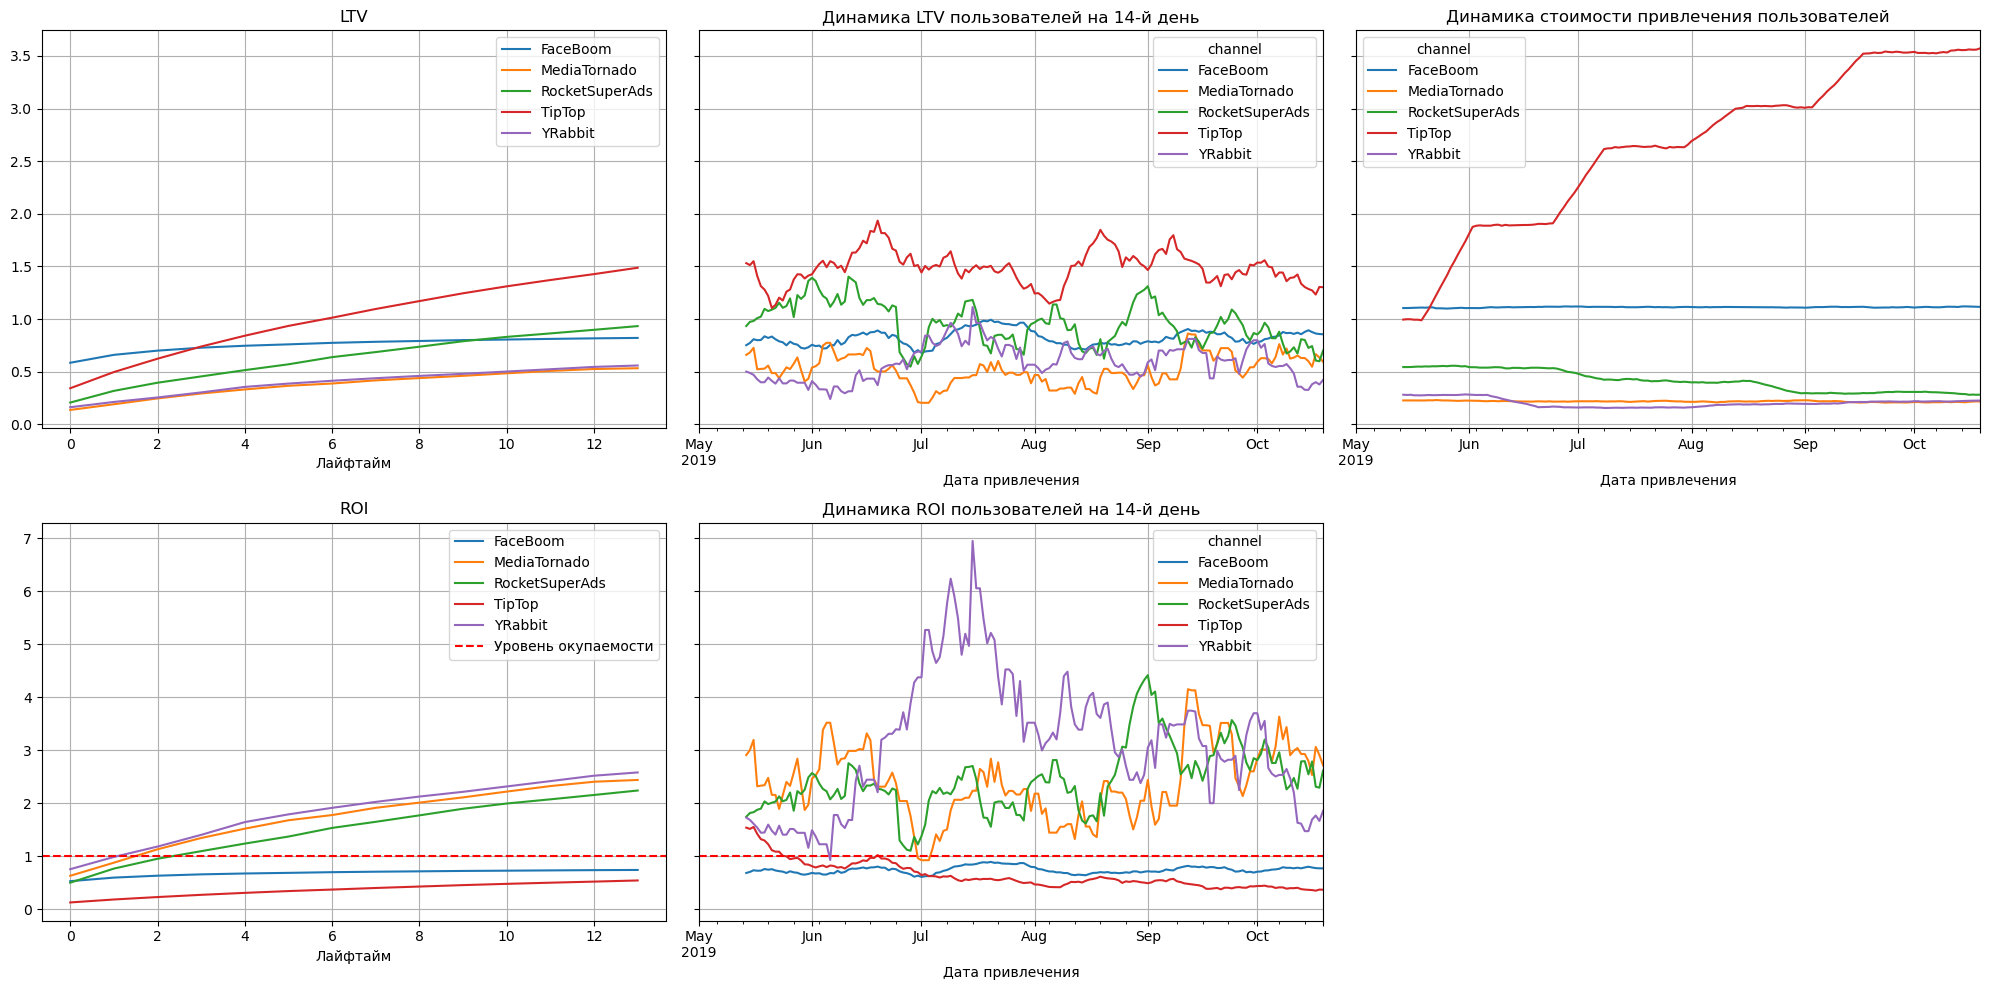

In [42]:
# смотрим окупаемость в США с разбивкой по каналам
profiles = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

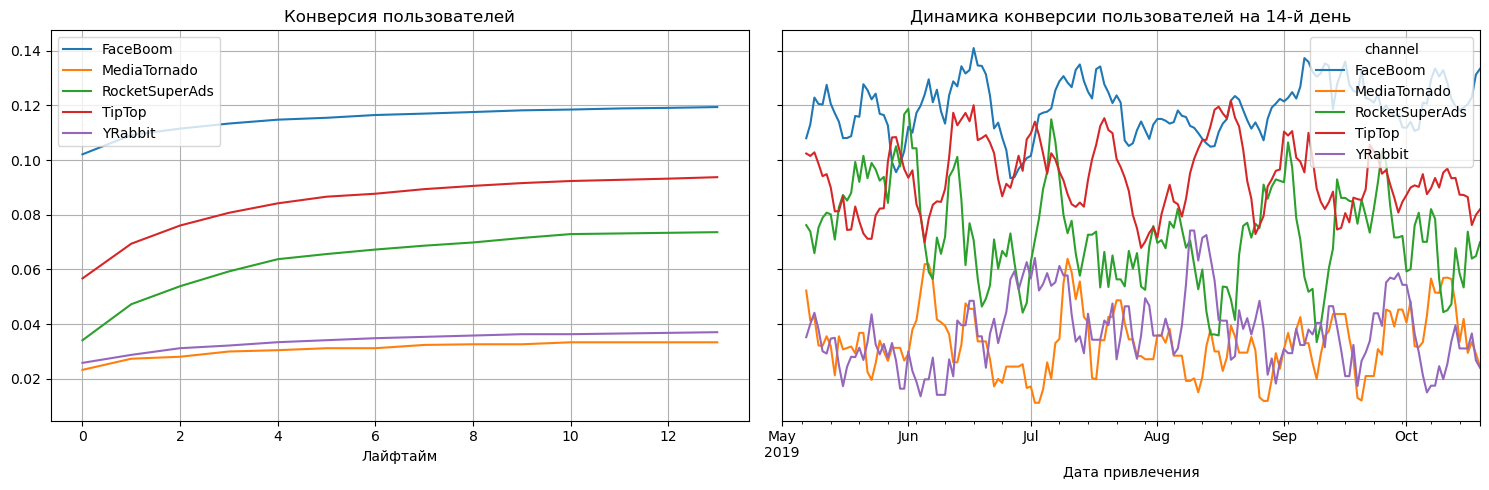

In [43]:
# смотрим конверсию в США с разбивкой по каналам
profiles = profiles.query('region == "United States"')
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

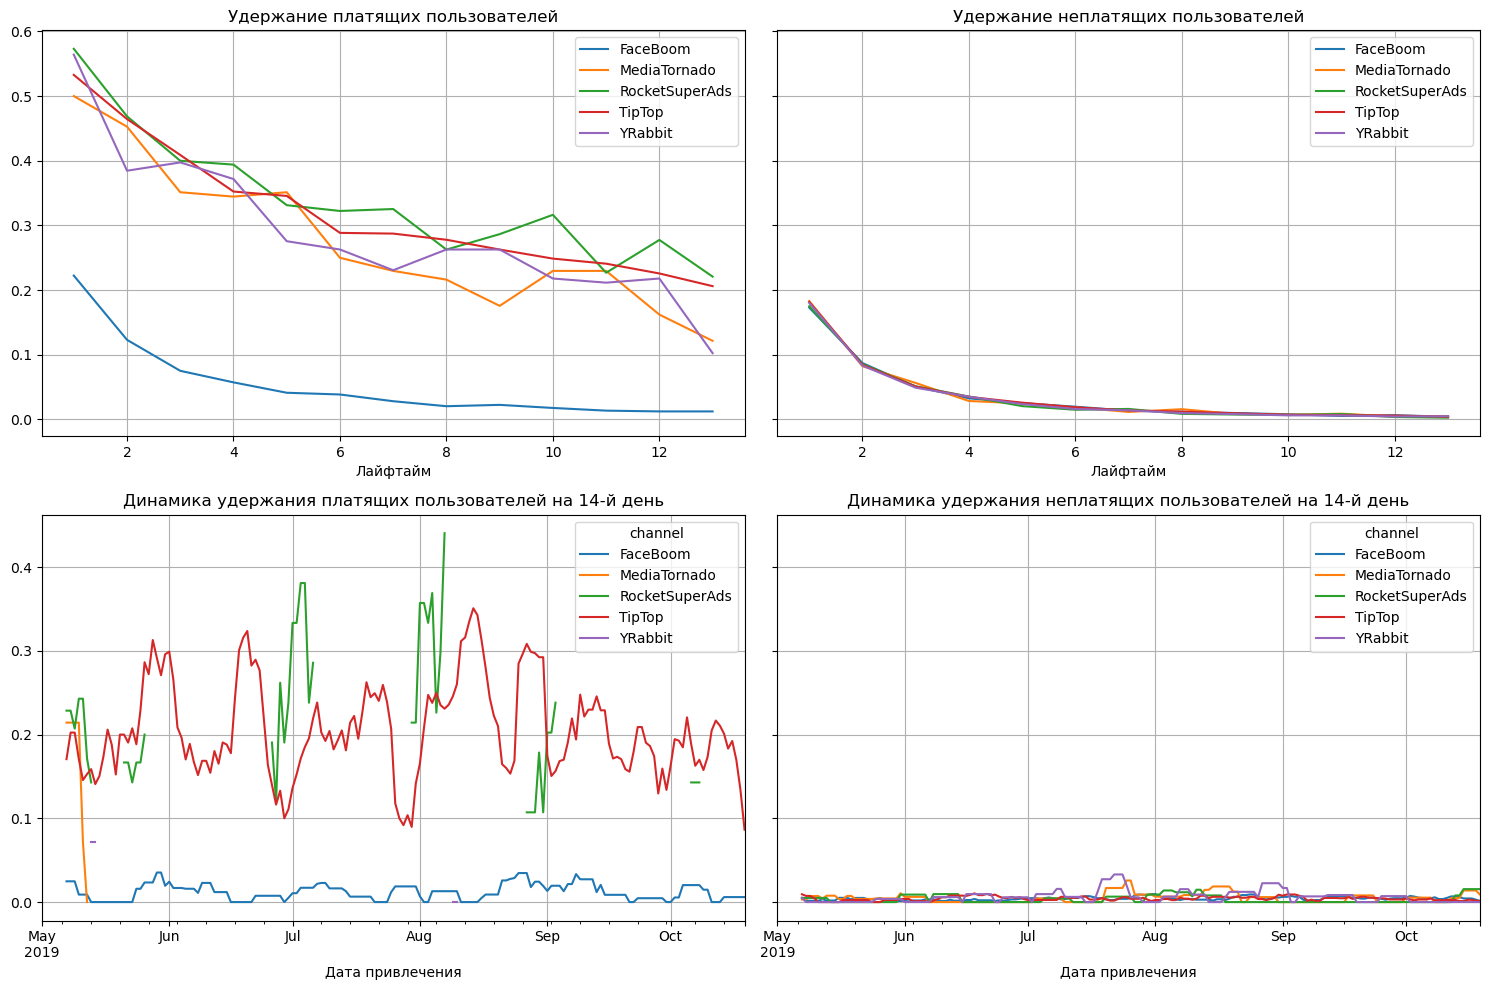

In [44]:
# смотрим удержание в США по каналам
profiles = profiles.query('region == "United States"')
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

FaceBoom и TipTop не окупаются в регионе. Пользователи из FaceBoom отлично конвертируются, что означает значительные затраты рекламного бюджета, но удерживаются значительно хуже остальных. Стоимость привлечения для TipTop значительно больше LTV: LTV  - 1,5 доллара и стабилен, а показатель САС с середины сентября равен 3,5 долларам.

### Окупаемость по источникам рекламы

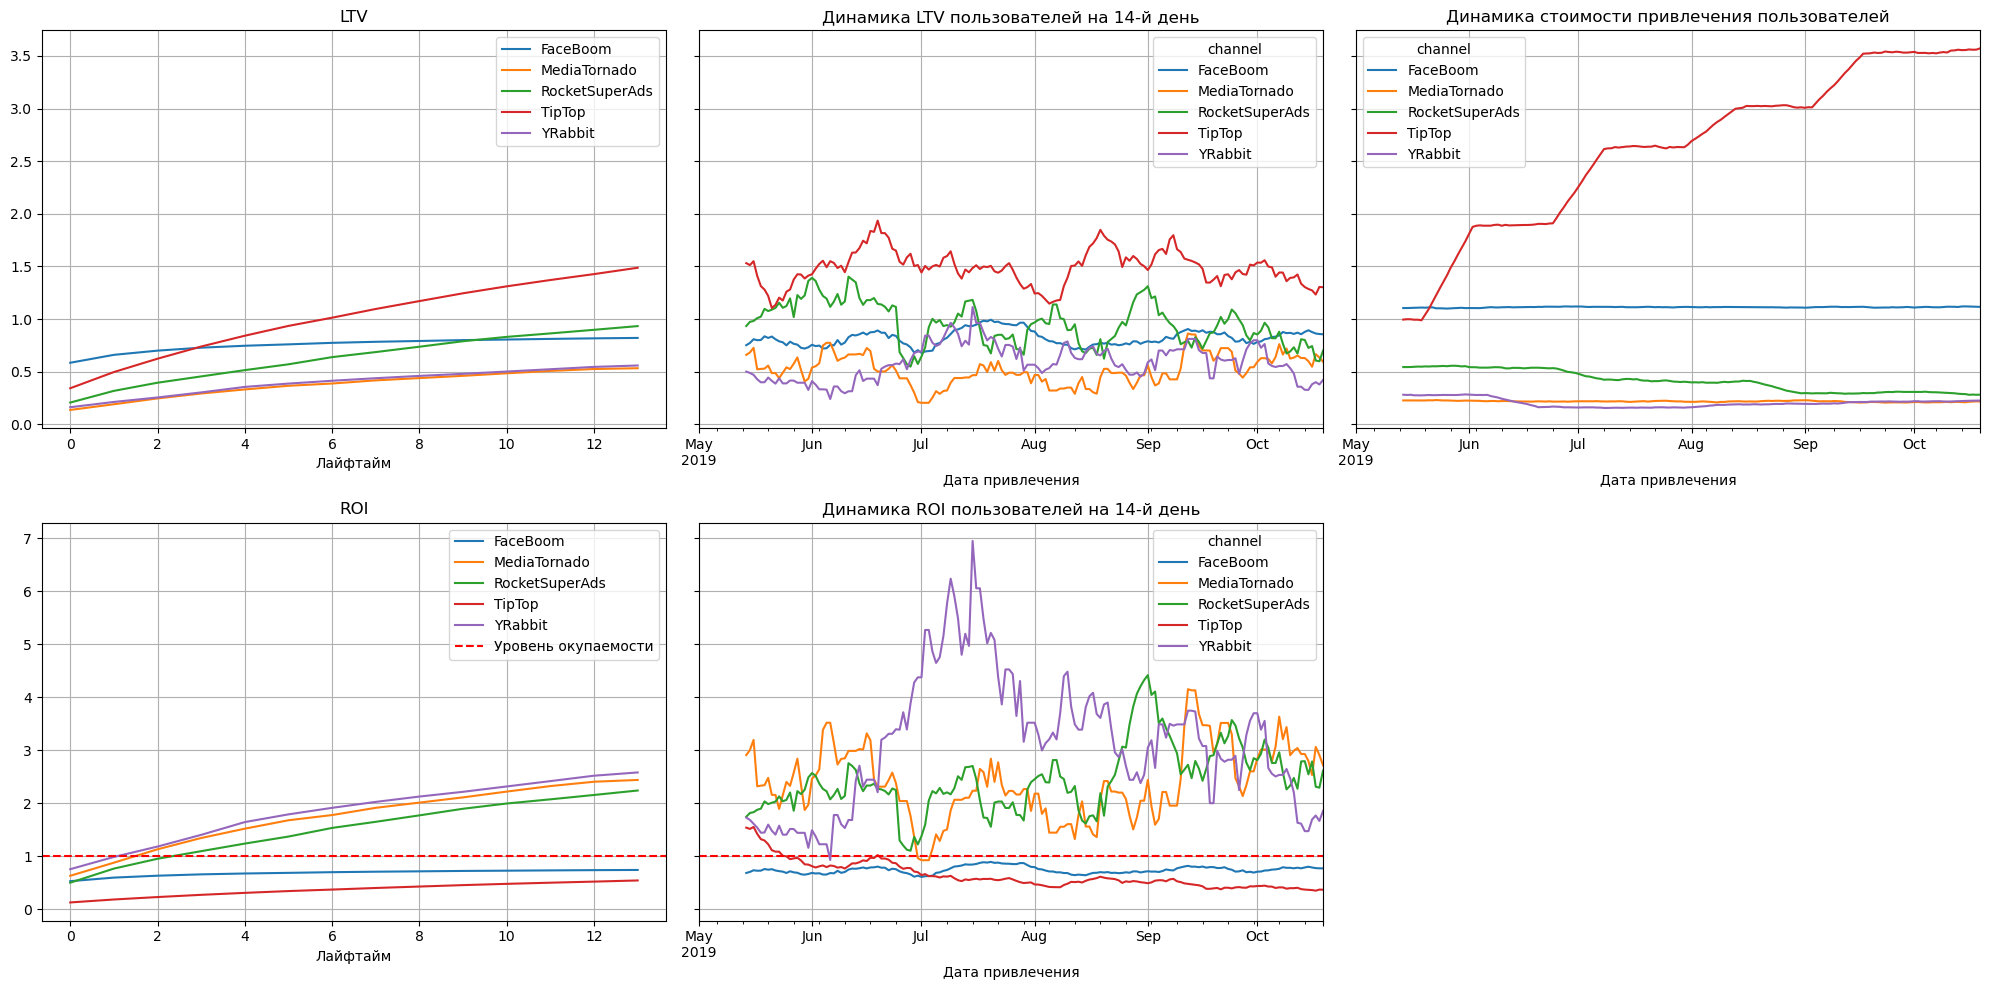

In [45]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


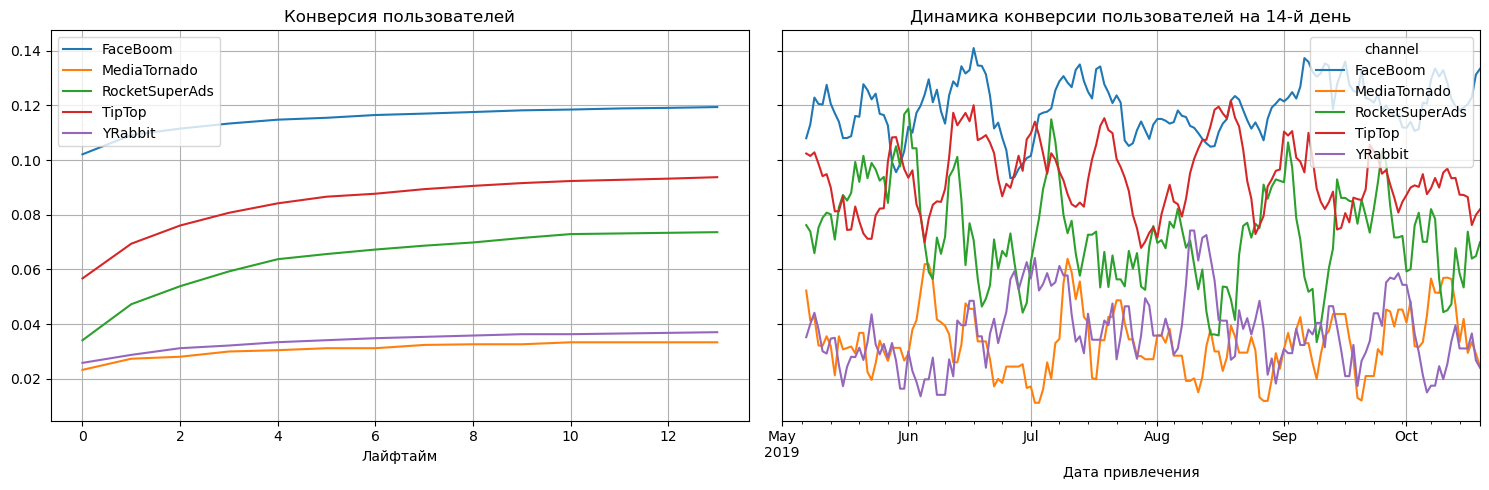

In [46]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

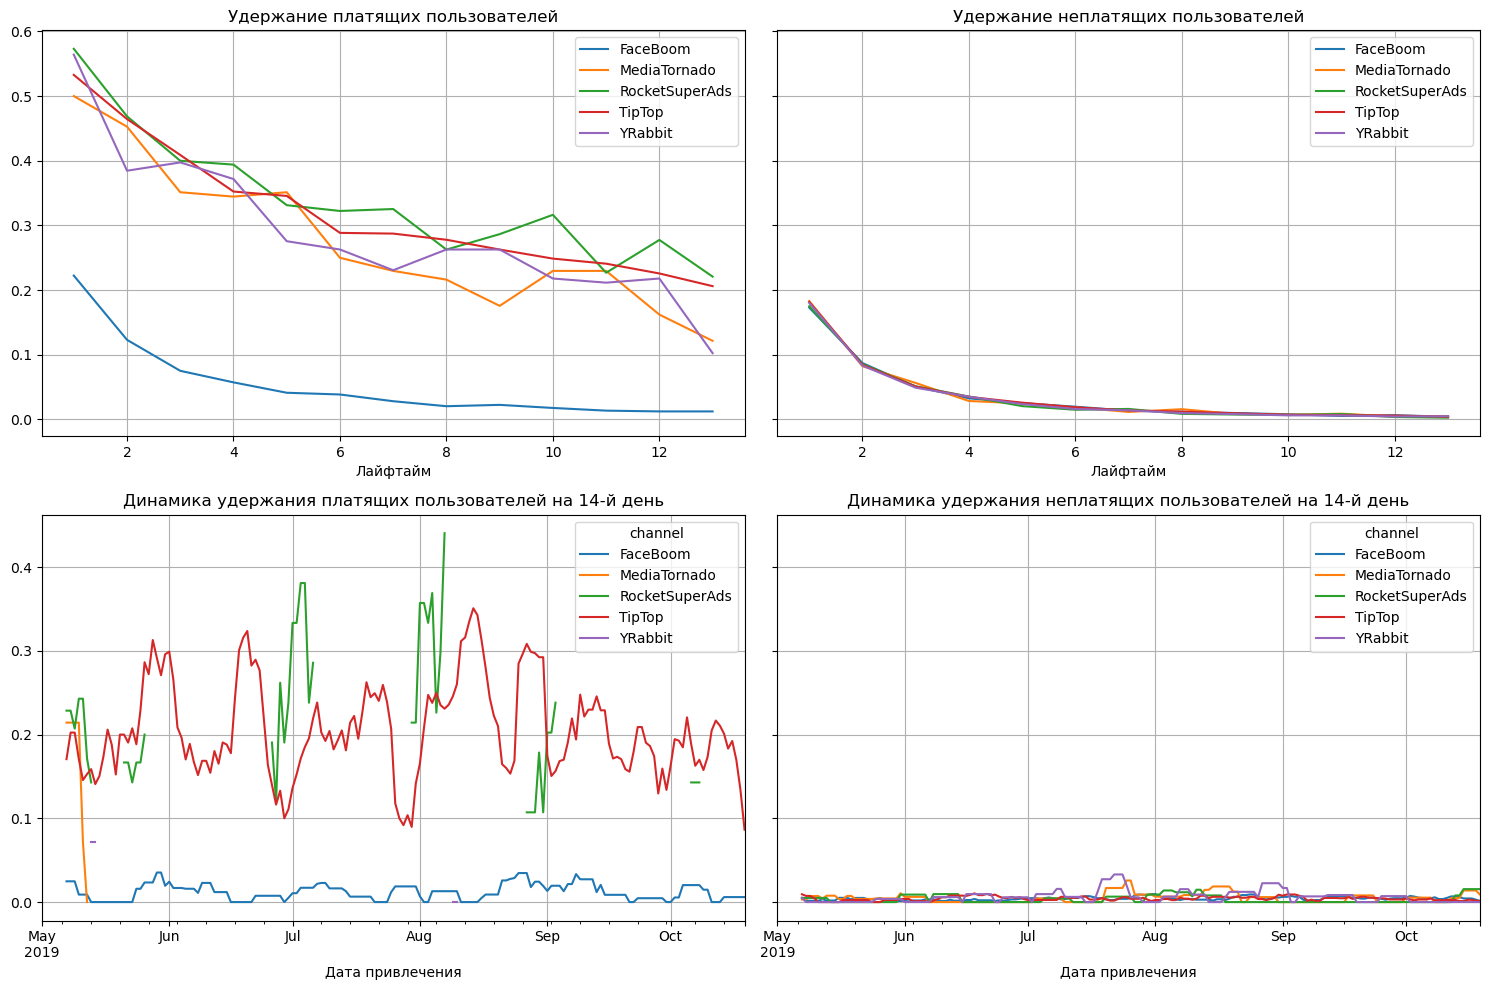

In [47]:
# смотрим удержание по ситочникам рекламы

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

## Выводы и рекомендации

- исследование основывается на 150 008 профилях, диапазон дат привлечения пользователей - с 1 мая 2019 по 27 октября 2019;
- 2/3 пользователей приложения из США и на долю этой страны приходится больше всего платящих пользователей - 6.9%, наименьшая доля платящих пользователей из Франции - 3.8%;
- большая часть клиентов приложения пользуется им на iPhone - 54 479 человек. Mac и PC используются около 30 000 пользователей и чуть больше - 35 000 - пользователи Android. Доя платящих клиентов выше всего среди пользователей с Mac - 6.36%, а наименьшая среди клиентов с PC - 5.05%;
- FaceBoom, AdNonSense и lambdaMediaAds - самые результативные каналы привления по доле платящих пользователей - 12.2, 11.34 и 10.47% соответственно клиентов приложения, привлеченных через них, платят. Минимальная доля платящих пользователей среди тех, кто пришел органически через поисковые системы - 2.06%. 
- общая сумма расходов на маркетинг с 1 мая 2019 по 27 октября 2019 - 105 497 долларов;
- на долю TipTop и FaceBoom приходится 80% затрат на рекламу и именно эти источники имеют самый значительный рост затрат в динамике с мая по октябрь, затраты на остальные источники не имеют выраженных колебаний в суммах. В мае затраты на TipTop составляли менее 500 долларов в неделю, а к концу сентября бюджет был 4000 в максимуме. Разброс сумм для FaceBoom меньше - в мае затраты около 500 долларов, с пиком около 1800 долларов в неделю;
- по средней стоимости привлечения 1 пользователя самыми дорогими оказалить следующие каналы привлечения TipTop, FaceBoom и AdNonSense - 2.79, 1.11 и 1 доллар за пользователя соответственно.
- в общем реклама не окупается. В разбивке по источникам не окупается реклама из самых массовых источников TipTop и FaceBoom по причине их стоимости значительно превышающей показатель LTV;
- окупается реклама в Великобритании, Франции и Германии, но не окупается в США. США лидирует по показателю LTV, но высокая стоимость привлечения пользователя не позволяет рекламе окупиться.
- существуют значимые отличия в показателям между США и остальными странами: конверсия в регионе в 2 раза выше, чем в Великобритании, Франции и Германии, но удержание при этом значительно хуже, чем в вышеописанных старнах - 0,1% в США к концу второй недели против 0,18% в остальных локациях. В США самые низкие показатели удержания платящих пользователей характерны для клиентов из FaceBoom, рекомендовано исследовать причины низких значений удержания пользователей из FaceBoom.
- с 11 дня окупается реклама с привлечением пользователей, которые пользуются приложением на PC, при этом значения LTV и CAC для этого типа устройст самые низкие. Эти пользователи хуже всего окнвертируются, но лучше всего удерживаются, хотя показатель и имеет значительный разброс значений в динамике - от 0,015 до 0,25. Стоимость привлечения пользователей растет в динамике, но не так радикально как для Mac, iPhone и по-прежнему является наименьшей.
- рекомендуется проверить гипотезу и сместить фокус внимания с пользователей с iPhone на пользователей с PC. Стоимость привлечения пользователя значительно растет для Mac, iPhone - TipTop и FaceBoom самые затратные каналы привлечения. Пользователи с устройствами от Apple лучше остальных конвертируются, "съедая" значительную часть рекламных бюджетов, но держатся хуже остальных, не давая успеть рекламе окупиться.
- в Tiptop залито 50% рекламного бюджета -  траты за период выросли с 2500 в месяц до 12500 в месяц. Самые дорогие пользователи приходят из TipTop - в среднем 2.8 доллара за привлечение одного, а LTV - при этом 1,5 доллара к концу второй недели пользования приложением. Конверсия и удержание пользователей из источника средние относительно остальных.
- рекомендовано контролировать стоимость затрат на привлечение пользователей из TipTop и удерживать это значение не выше 1,5 долларов при текущем уровне LTV для пользователей из данного рекламного источника.
- на FaceBoom потрачено 30% рекламного бюджета. Пользователи хорошо конвертируются, но плохо сохраняются + высокий САС - 1.11, а LTV при этом 0,8 доллара на 14 день. Рекомендовано исследовать причины низких значений удержания пользователей из FaceBoom.